# Problem Statement

Predicting the price of second hand vehicles by taking the raw data available online

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None  # default='warn'


## Load the raw data

In [2]:
raw_data = pd.read_csv('Car details v3.csv')

## Preprocessing

Exploring the descriptive statistics of variable

In [3]:
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
raw_data = raw_data.drop('name' , axis=1)

raw_data = raw_data.drop('seller_type' , axis=1)
raw_data = raw_data.drop('seats' , axis=1)
raw_data = raw_data.drop('torque' , axis=1)
raw_data = raw_data.drop('engine' , axis=1)

Dealing with missing values

In [5]:
raw_data.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          221
max_power        215
dtype: int64

In [6]:
data = raw_data.dropna(axis = 0)

In [7]:
data['mileage'] = data['mileage'].str.replace('kmpl','')
data['mileage'] = data['mileage'].str.replace('km/kg','')
data['max_power'] = data['max_power'].str.replace('bhp','')


Exploring the pdfs

<Axes: xlabel='selling_price', ylabel='Density'>

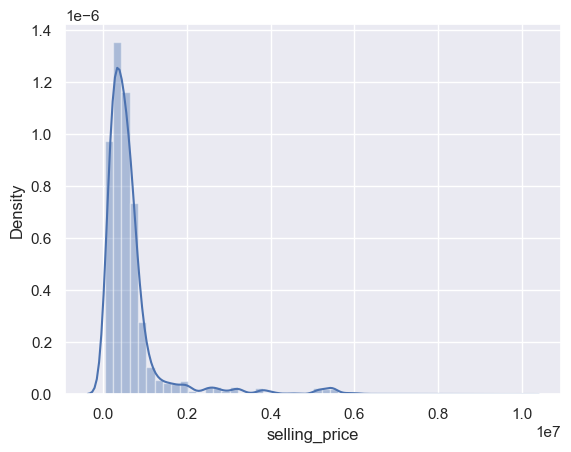

In [8]:
sns.distplot(data['selling_price'])

<Axes: xlabel='mileage', ylabel='Density'>

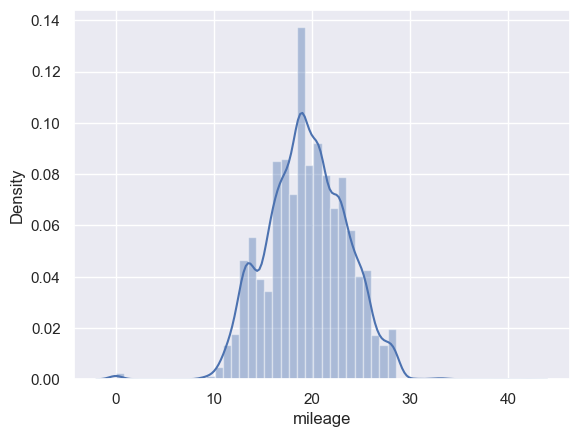

In [9]:
sns.distplot(data['mileage'])

In [10]:
data_cleaned = data.copy()

In [11]:
data_cleaned.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,max_power
0,2014,450000,145500,Diesel,Manual,First Owner,23.4,74
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,103.52
2,2006,158000,140000,Petrol,Manual,Third Owner,17.7,78
3,2010,225000,127000,Diesel,Manual,First Owner,23.0,90
4,2007,130000,120000,Petrol,Manual,First Owner,16.1,88.2


## Checking the OLS assumptions

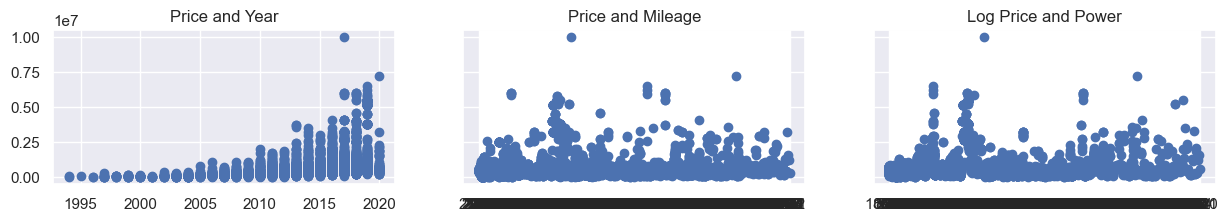

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,2))
ax1.scatter(data_cleaned['year'],data_cleaned['selling_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['mileage'],data_cleaned['selling_price'])
ax2.set_title('Price and Mileage')
ax3.scatter(data_cleaned['max_power'],data_cleaned['selling_price'])
ax3.set_title('Log Price and Power')


plt.show()

In [13]:

log_price = np.log(data_cleaned['selling_price'])
data_cleaned['log_price'] = log_price
data_cleaned

,year,selling_price,km_driven,fuel,transmission,owner,mileage,max_power,log_price
0,2014,450000,145500,Diesel,Manual,First Owner,23.4,74,13.017003
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,103.52,12.821258
2,2006,158000,140000,Petrol,Manual,Third Owner,17.7,78,11.970350
3,2010,225000,127000,Diesel,Manual,First Owner,23.0,90,12.323856
4,2007,130000,120000,Petrol,Manual,First Owner,16.1,88.2,11.775290
...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,First Owner,18.5,82.85,12.676076
8124,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.8,110,11.813030
8125,2009,382000,120000,Diesel,Manual,First Owner,19.3,73.9,12.853176
8126,2013,290000,25000,Diesel,Manual,First Owner,23.57,70,12.577636


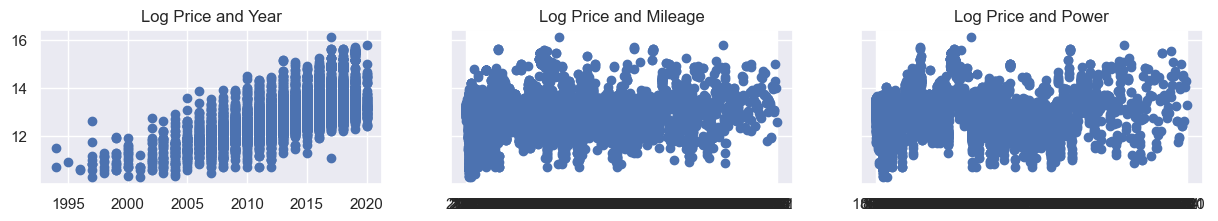

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,2))
ax1.scatter(data_cleaned['year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['mileage'],data_cleaned['log_price'])
ax2.set_title('Log Price and Mileage')
ax3.scatter(data_cleaned['max_power'],data_cleaned['log_price'])
ax3.set_title('Log Price and Power')

plt.show()

In [15]:
data_cleaned = data_cleaned.drop(['selling_price'],axis=1)

## Check for multicollinearity

In [16]:
data_cleaned.columns.values
data_cleaned.dtypes

year              int64
km_driven         int64
fuel             object
transmission     object
owner            object
mileage          object
max_power        object
log_price       float64
dtype: object

In [17]:
data_cleaned.describe(include='all')


,year,km_driven,fuel,transmission,owner,mileage,max_power,log_price
count,7907.000000,7.907000e+03,7907,7907,7907,7907,7907,7907.000000
unique,NaN,NaN,4,2,5,381,320,NaN
top,NaN,NaN,Diesel,Manual,First Owner,18.9,74,NaN
freq,NaN,NaN,4299,6866,5215,225,377,NaN
mean,2013.982168,6.919256e+04,NaN,NaN,NaN,NaN,NaN,12.998973
std,3.866650,5.678976e+04,NaN,NaN,NaN,NaN,NaN,0.827790
min,1994.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN,10.308919
25%,2012.000000,3.500000e+04,NaN,NaN,NaN,NaN,NaN,12.506177
50%,2015.000000,6.000000e+04,NaN,NaN,NaN,NaN,NaN,13.017003
75%,2017.000000,9.575000e+04,NaN,NaN,NaN,NaN,NaN,13.444447


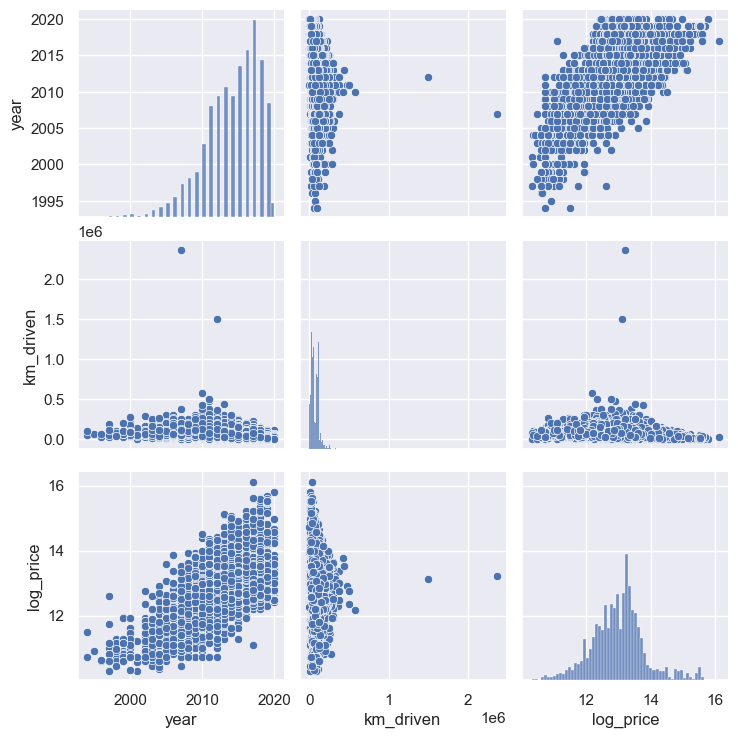

In [18]:
sns.pairplot(data=data_cleaned)
plt.show()

In [19]:
data_cleaned.columns.values
data_cleaned.dtypes


year              int64
km_driven         int64
fuel             object
transmission     object
owner            object
mileage          object
max_power        object
log_price       float64
dtype: object

In [20]:
data_cleaned['mileage'] = pd.to_numeric(data_cleaned['mileage'])


In [21]:
data_cleaned['max_power'] = pd.to_numeric(data_cleaned['max_power'],downcast='integer')


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['km_driven', 'mileage','max_power']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [23]:
vif

,VIF,features
0,2.257069,km_driven
1,5.117832,mileage
2,4.770548,max_power


## Creating dummy variavble

In [24]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True, dtype='float')

In [25]:
data_with_dummies.head()

,year,km_driven,mileage,max_power,log_price,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,74.00,13.017003,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,103.52,12.821258,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2006,140000,17.70,78.00,11.970350,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,2010,127000,23.00,90.00,12.323856,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2007,120000,16.10,88.20,11.775290,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Linear regression model

In [26]:
targets = data_with_dummies['log_price']
inputs = data_with_dummies.drop(['log_price'],axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [28]:
inputs_scaled = scaler.transform(inputs)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=47)

In [30]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
y_hat = reg.predict(x_train)

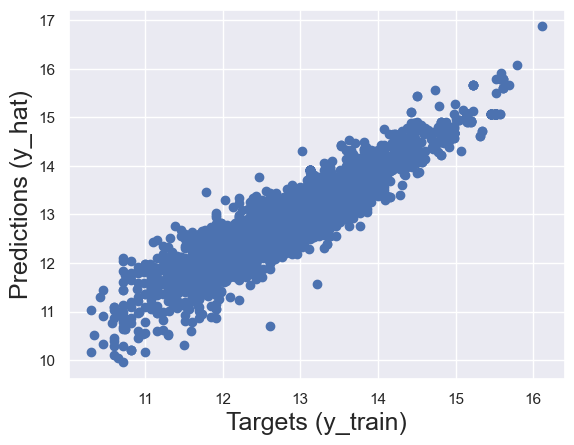

In [32]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

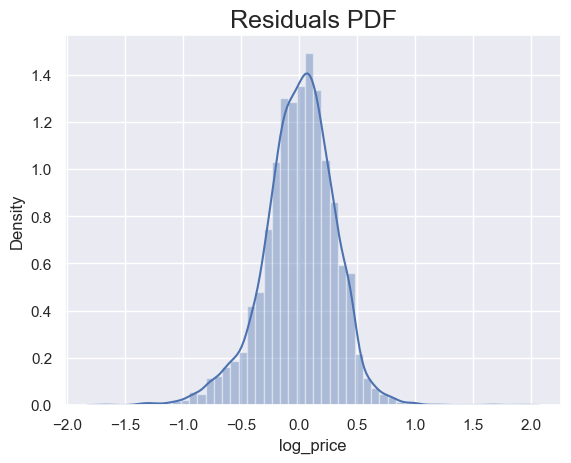

In [33]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [34]:
reg.score(x_train,y_train)

0.863400545785778

In [35]:
reg.intercept_

12.999765099628304

In [36]:
reg.coef_

array([ 0.44436682, -0.00761579, -0.02147876,  0.41209031,  0.13401729,
        0.00895731,  0.004941  , -0.07499864, -0.01636161, -0.03482381,
        0.02189176, -0.03315957])

In [37]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,year,0.444367
1,km_driven,-0.007616
2,mileage,-0.021479
3,max_power,0.412090
4,fuel_Diesel,0.134017
5,fuel_LPG,0.008957
6,fuel_Petrol,0.004941
7,transmission_Manual,-0.074999
8,owner_Fourth & Above Owner,-0.016362
9,owner_Second Owner,-0.034824


# Testing

In [38]:
y_hat_test = reg.predict(x_test)

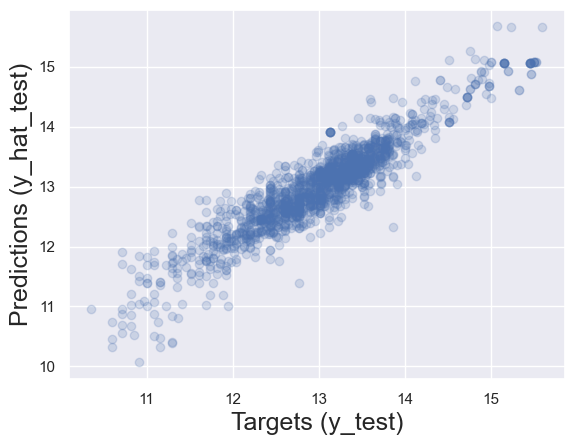

In [39]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [40]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,619059.467433
1,407056.568120
2,695797.038701
3,590690.692998
4,168907.903893


In [41]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,619059.467433,450000.0
1,407056.568120,NaN
2,695797.038701,NaN
3,590690.692998,NaN
4,168907.903893,NaN
...,...,...
1577,517561.286002,NaN
1578,526460.095064,550000.0
1579,400598.517652,425000.0
1580,358719.225916,220000.0


In [42]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    13.567049
1    12.793859
2    13.591116
3    13.304685
4    11.849398
Name: log_price, dtype: float64

In [43]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,619059.467433,780000.0
1,407056.568120,360000.0
2,695797.038701,799000.0
3,590690.692998,600000.0
4,168907.903893,140000.0
...,...,...
1577,517561.286002,900000.0
1578,526460.095064,560000.0
1579,400598.517652,444000.0
1580,358719.225916,330000.0


In [44]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [45]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,619059.467433,780000.0,160940.532567,20.633402
1,407056.568120,360000.0,-47056.568120,13.071269
2,695797.038701,799000.0,103202.961299,12.916516
3,590690.692998,600000.0,9309.307002,1.551551
4,168907.903893,140000.0,-28907.903893,20.648503
...,...,...,...,...
1577,517561.286002,900000.0,382438.713998,42.493190
1578,526460.095064,560000.0,33539.904936,5.989269
1579,400598.517652,444000.0,43401.482348,9.775109
1580,358719.225916,330000.0,-28719.225916,8.702796


In [46]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1.582000e+03,1.582000e+03,1.582000e+03,1582.000000
mean,6.044335e+05,6.348182e+05,3.038476e+04,24.923615
std,6.313215e+05,7.452362e+05,2.978290e+05,25.438805
min,2.354628e+04,3.150400e+04,-2.886562e+06,0.005506
25%,2.908009e+05,2.750000e+05,-6.944133e+04,8.708464
50%,4.662950e+05,4.650000e+05,6.108777e+03,18.030248
75%,6.681317e+05,7.000000e+05,8.791220e+04,30.921982
max,6.386562e+06,5.923000e+06,2.316678e+06,228.099606


In [47]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
281,670036.89,670000.00,-36.89,0.01
83,565048.50,565000.00,-48.50,0.01
1509,610066.58,610000.00,-66.58,0.01
938,300062.35,300000.00,-62.35,0.02
1029,650560.29,650000.00,-560.29,0.09
...,...,...,...,...
498,395020.84,150000.00,-245020.84,163.35
718,120925.47,45000.00,-75925.47,168.72
1044,355564.02,120000.00,-235564.02,196.30
1476,351505.15,110000.00,-241505.15,219.55
